<a href="https://colab.research.google.com/github/Navneet-Nicer/Bike-Sharing-Demand-Prediction/blob/main/Regression_Bike_Sharing_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    -   $\color{red}{\text{Bike Sharing Demand Prediction}}$

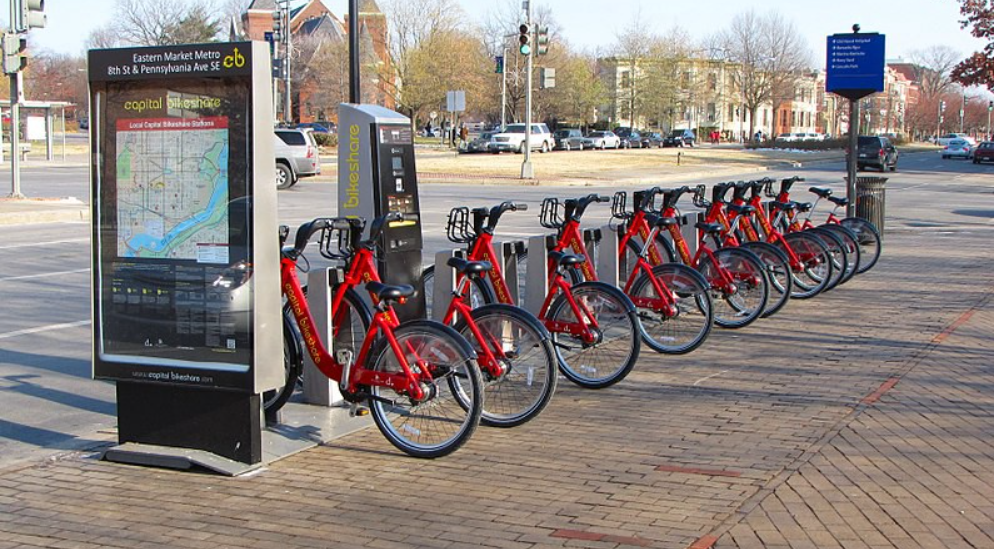

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Navneet Singh}}$


### **GitHub Link -**

https://github.com/Naveen-King/Bike-Sharing-Demand-Prediction

**Data Set Information:**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

🔶Date : year-month-day

🔶Rented Bike count - Count of bikes rented at each hour

🔶Hour - Hour of he day

🔶Temperature-Temperature in Celsius

🔶Humidity - %

🔶Windspeed - m/s

🔶Visibility - 10m

🔶Dew point temperature - Celsius

🔶Solar radiation - MJ/m2

🔶Rainfall - mm

🔶Snowfall - cm

🔶Seasons - Winter, Spring, Summer, Autumn

🔶Holiday - Holiday/No holiday

🔶Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



**Table of Contents :**

**Data Manipulation**

Importing Dataset

Dataset View

Dataset Information

Summary Statistics

Checking for unique values in integer type attribute

Checking for missing values in each column

percentage of missing values in each column

**Data Visualization**

Missing Value Plot

Density Plot of Continuous Variables

Box plot for each continuous variavles

Heatmap

Density plot of each continuous variable after applying Power Transformer

Box plot of each continuous variable after applying Power Transformer

Bar Plot of each variable show label distribution of target variable

Pie chart of Categorical Variables

Count Plot of Categorical variable

**Variance Inflation Factor**

**Feature Selection**

Feature Importance Graph

**Splitting our dataset into train and test set**

**Feature Scaling**

**Modeling**

linear Regression

Polynomial Regression

Decision Tree Regresion

Random Forest Regression

Bagging Regressor

Stacking Regressor

**Model Comparison**

Maximum Accuracies in each Column

Minimum Accuracies in each Column

## **Data Manipulation**

#### **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

#### **Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Bike Sharing.csv', encoding= 'unicode_escape')

In [ ]:
# Dataset View
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


**Dataset Information**

* One feature is in Date type.

* Four Features are in integer data types.

* Six Features are in float data types.

* Three Features are in object data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        8760 non-null   object 
 1   Rented Bike Count           8760 non-null   int64  
 2   Hour                        8760 non-null   int64  
 3   Temperature(Â°C)            8760 non-null   float64
 4   Humidity(%)                 8760 non-null   int64  
 5   Wind speed (m/s)            8760 non-null   float64
 6   Visibility (10m)            8760 non-null   int64  
 7   Dew point temperature(Â°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)     8760 non-null   float64
 9   Rainfall(mm)                8760 non-null   float64
 10  Snowfall (cm)               8760 non-null   float64
 11  Seasons                     8760 non-null   object 
 12  Holiday                     8760 non-null   object 
 13  Functioning Day             8760 

In [ ]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        8760 non-null   object 
 1   Rented Bike Count           8760 non-null   float64
 2   Hour                        8760 non-null   object 
 3   Temperature(Â°C)            8760 non-null   float64
 4   Humidity(%)                 8760 non-null   int64  
 5   Wind speed (m/s)            8760 non-null   float64
 6   Visibility (10m)            8760 non-null   int64  
 7   Dew point temperature(Â°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)     8760 non-null   float64
 9   Rainfall(mm)                8760 non-null   float64
 10  Snowfall (cm)               8760 non-null   float64
 11  Seasons                     8760 non-null   object 
 12  Holiday                     8760 non-null   object 
 13  Functioning Day             8760 

In [ ]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

**Brief Information of different descriptive statistics-**

* Measures of Frequency :- Count, Percent, Frequency.

* Measures of Central Tendency :- Mean, Median, and Mode.

* Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.

* Measures of Position :- Percentile Ranks, Quartile Ranks.

In [ ]:
df.describe().style.background_gradient()

,Rented Bike Count,Temperature(Â°C),Humidity,Wind speed,Visibility,Dew point temperature(Â°C),Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Checking for unique values in all attribute, Different numbers of distint values in each attribute.our target varibale is Rented Bike Count.

In [ ]:
df.nunique().sort_values(ascending=True)

Holiday                          2
Functioning Day                  2
Seasons                          4
Hour                            24
Snowfall                        51
Rainfall                        61
Wind speed                      65
Humidity                        90
Radiation                      345
Date                           365
Temperature(Â°C)               546
Dew point temperature(Â°C)     556
Visibility                    1789
Rented Bike Count             2166
dtype: int64

Checking for missing values in each column

In [ ]:
df.isnull().sum()

Date                          0
Rented Bike Count             0
Hour                          0
Temperature(Â°C)              0
Humidity                      0
Wind speed                    0
Visibility                    0
Dew point temperature(Â°C)    0
Radiation                     0
Rainfall                      0
Snowfall                      0
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

percentage of missing values in each column

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                         0.00 %
Rented Bike Count            0.00 %
Hour                         0.00 %
Temperature(Â°C)             0.00 %
Humidity                     0.00 %
Wind speed                   0.00 %
Visibility                   0.00 %
Dew point temperature(Â°C)   0.00 %
Radiation                    0.00 %
Rainfall                     0.00 %
Snowfall                     0.00 %
Seasons                      0.00 %
Holiday                      0.00 %
Functioning Day              0.00 %
dtype: float64


**Data Visualization**

Missing Value Plot

In [ ]:
import missingno as msno

<Axes: >

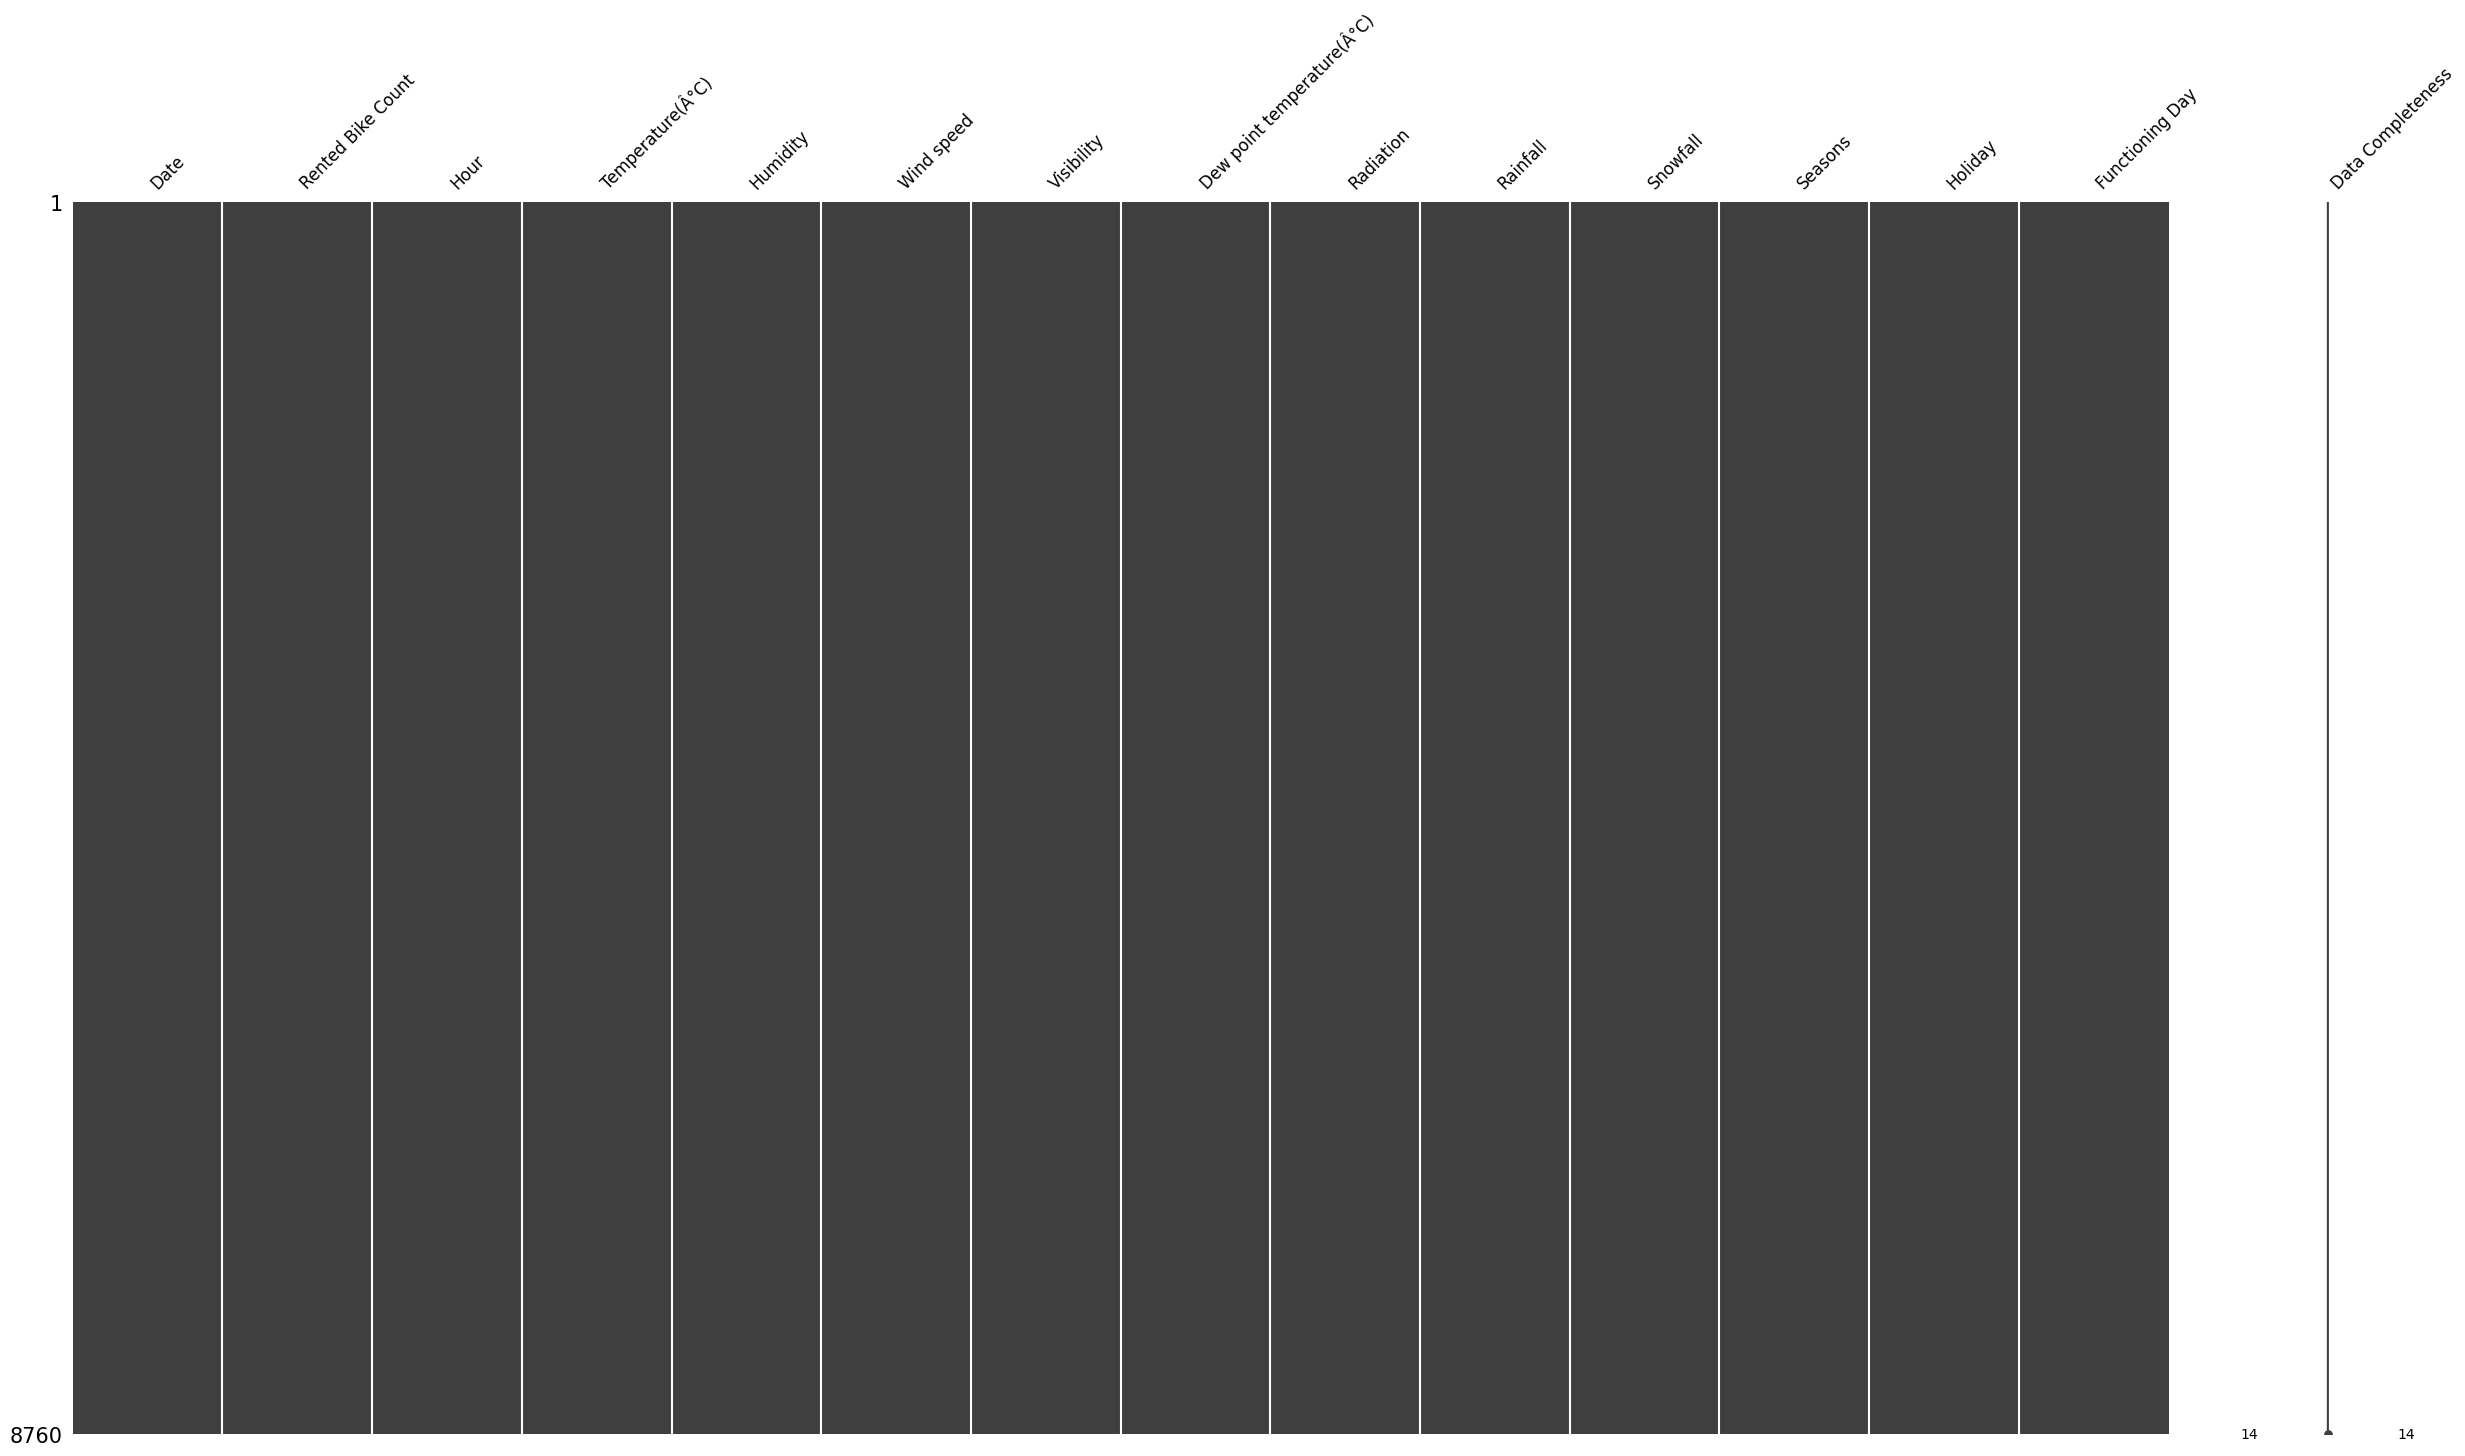

In [ ]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

**Bar Plot** - Here we can look at each plot and see the hours wise data distribution.

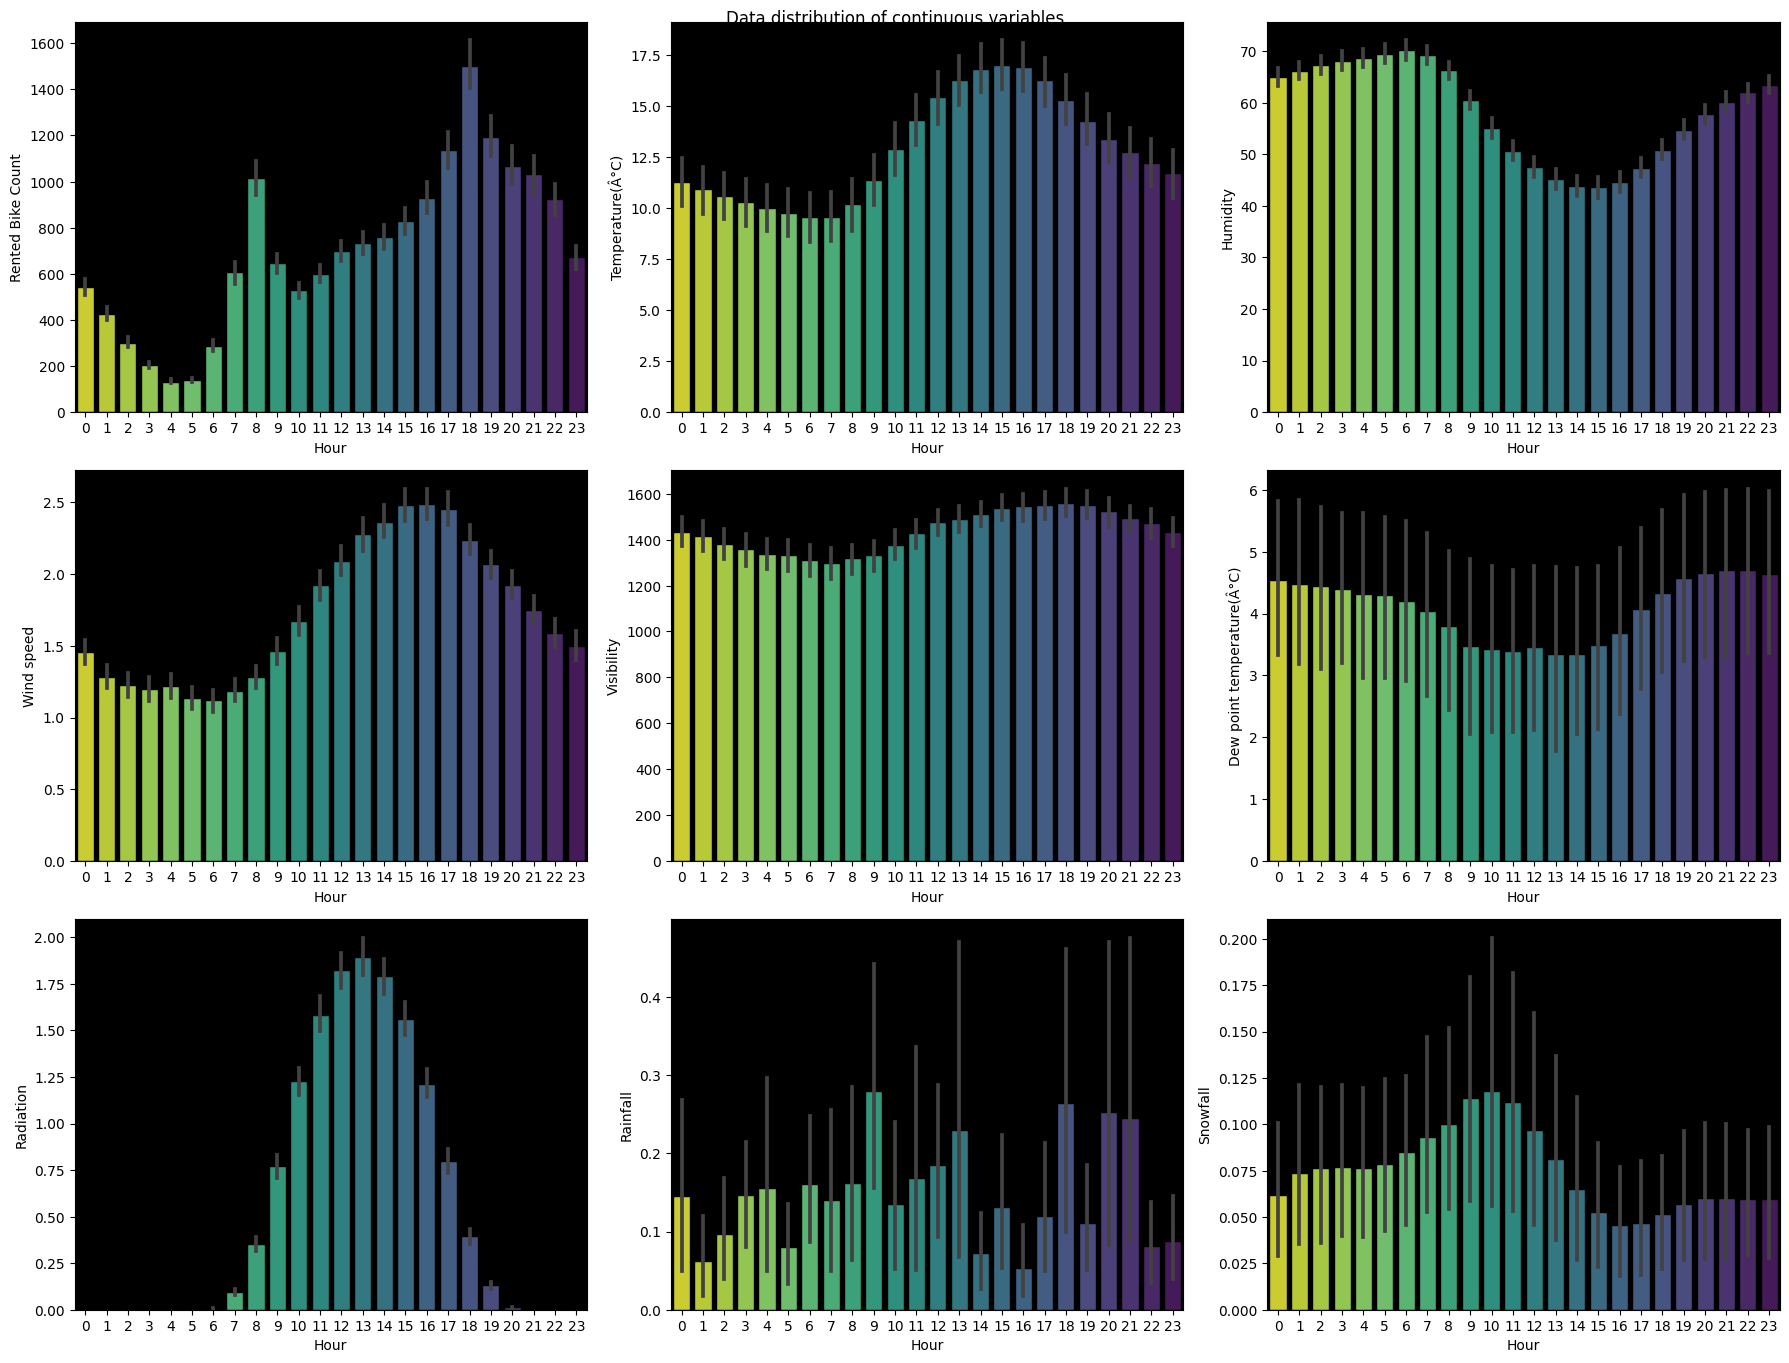

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Checking the data distribution of each Continuous variable**

What is skewed distribution?

If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.

Left Skewed or Negatively Skewed:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean<Median<Mode)

Right Skewed or Positively Skewed:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean>Median>Mode)

Symmetric Distribution:-A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution

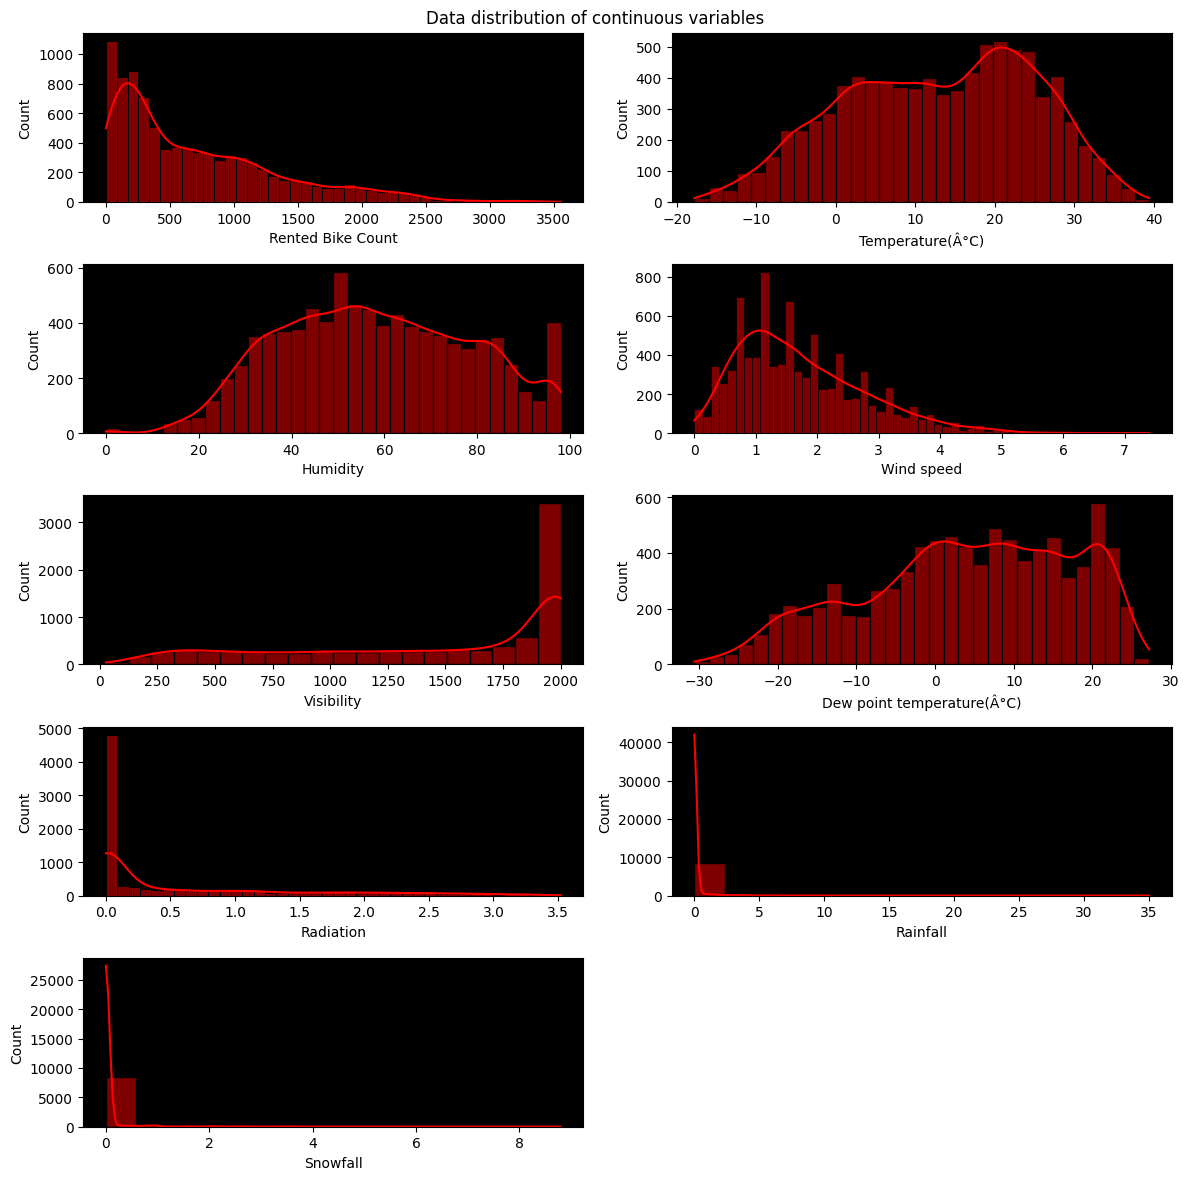

In [ ]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

From the above graph we can see that there are a lot of attributes which are positively or negatively distributed.


What is Box Plot?
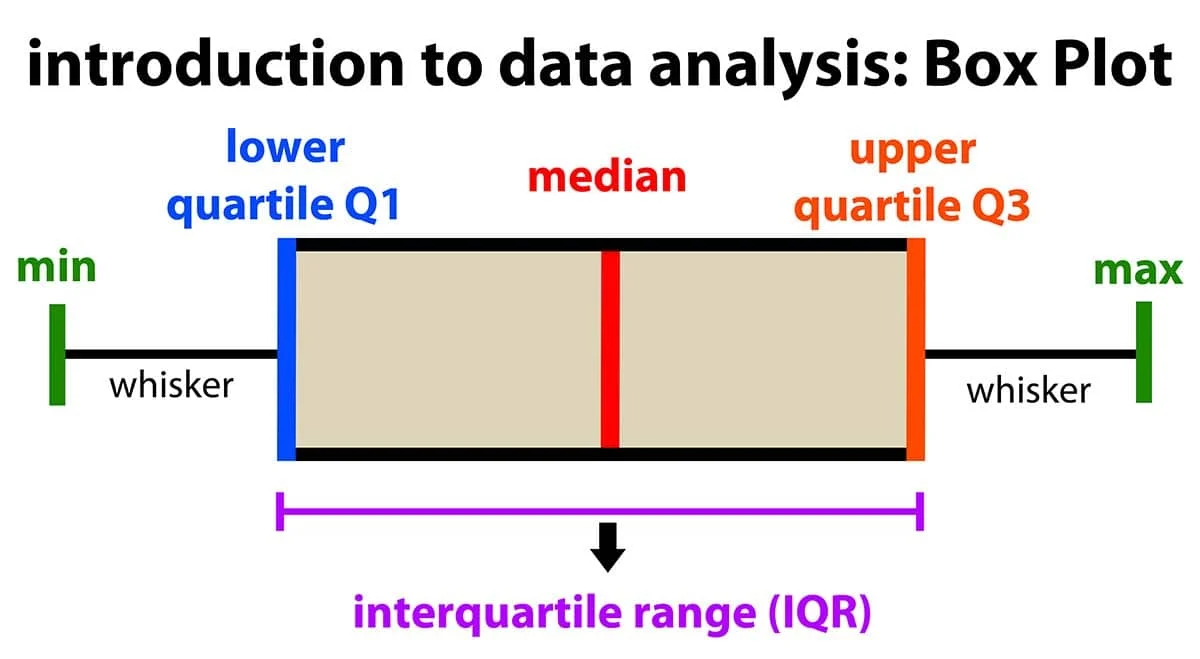
Computer manIn descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.



**How to interpret boxplot**
* Median: In the box plot, the median is displayed rather than the mean.
* Q1: The first quartile (25%) position.
* Q3: The third quartile (75%) position.
* Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.
* Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

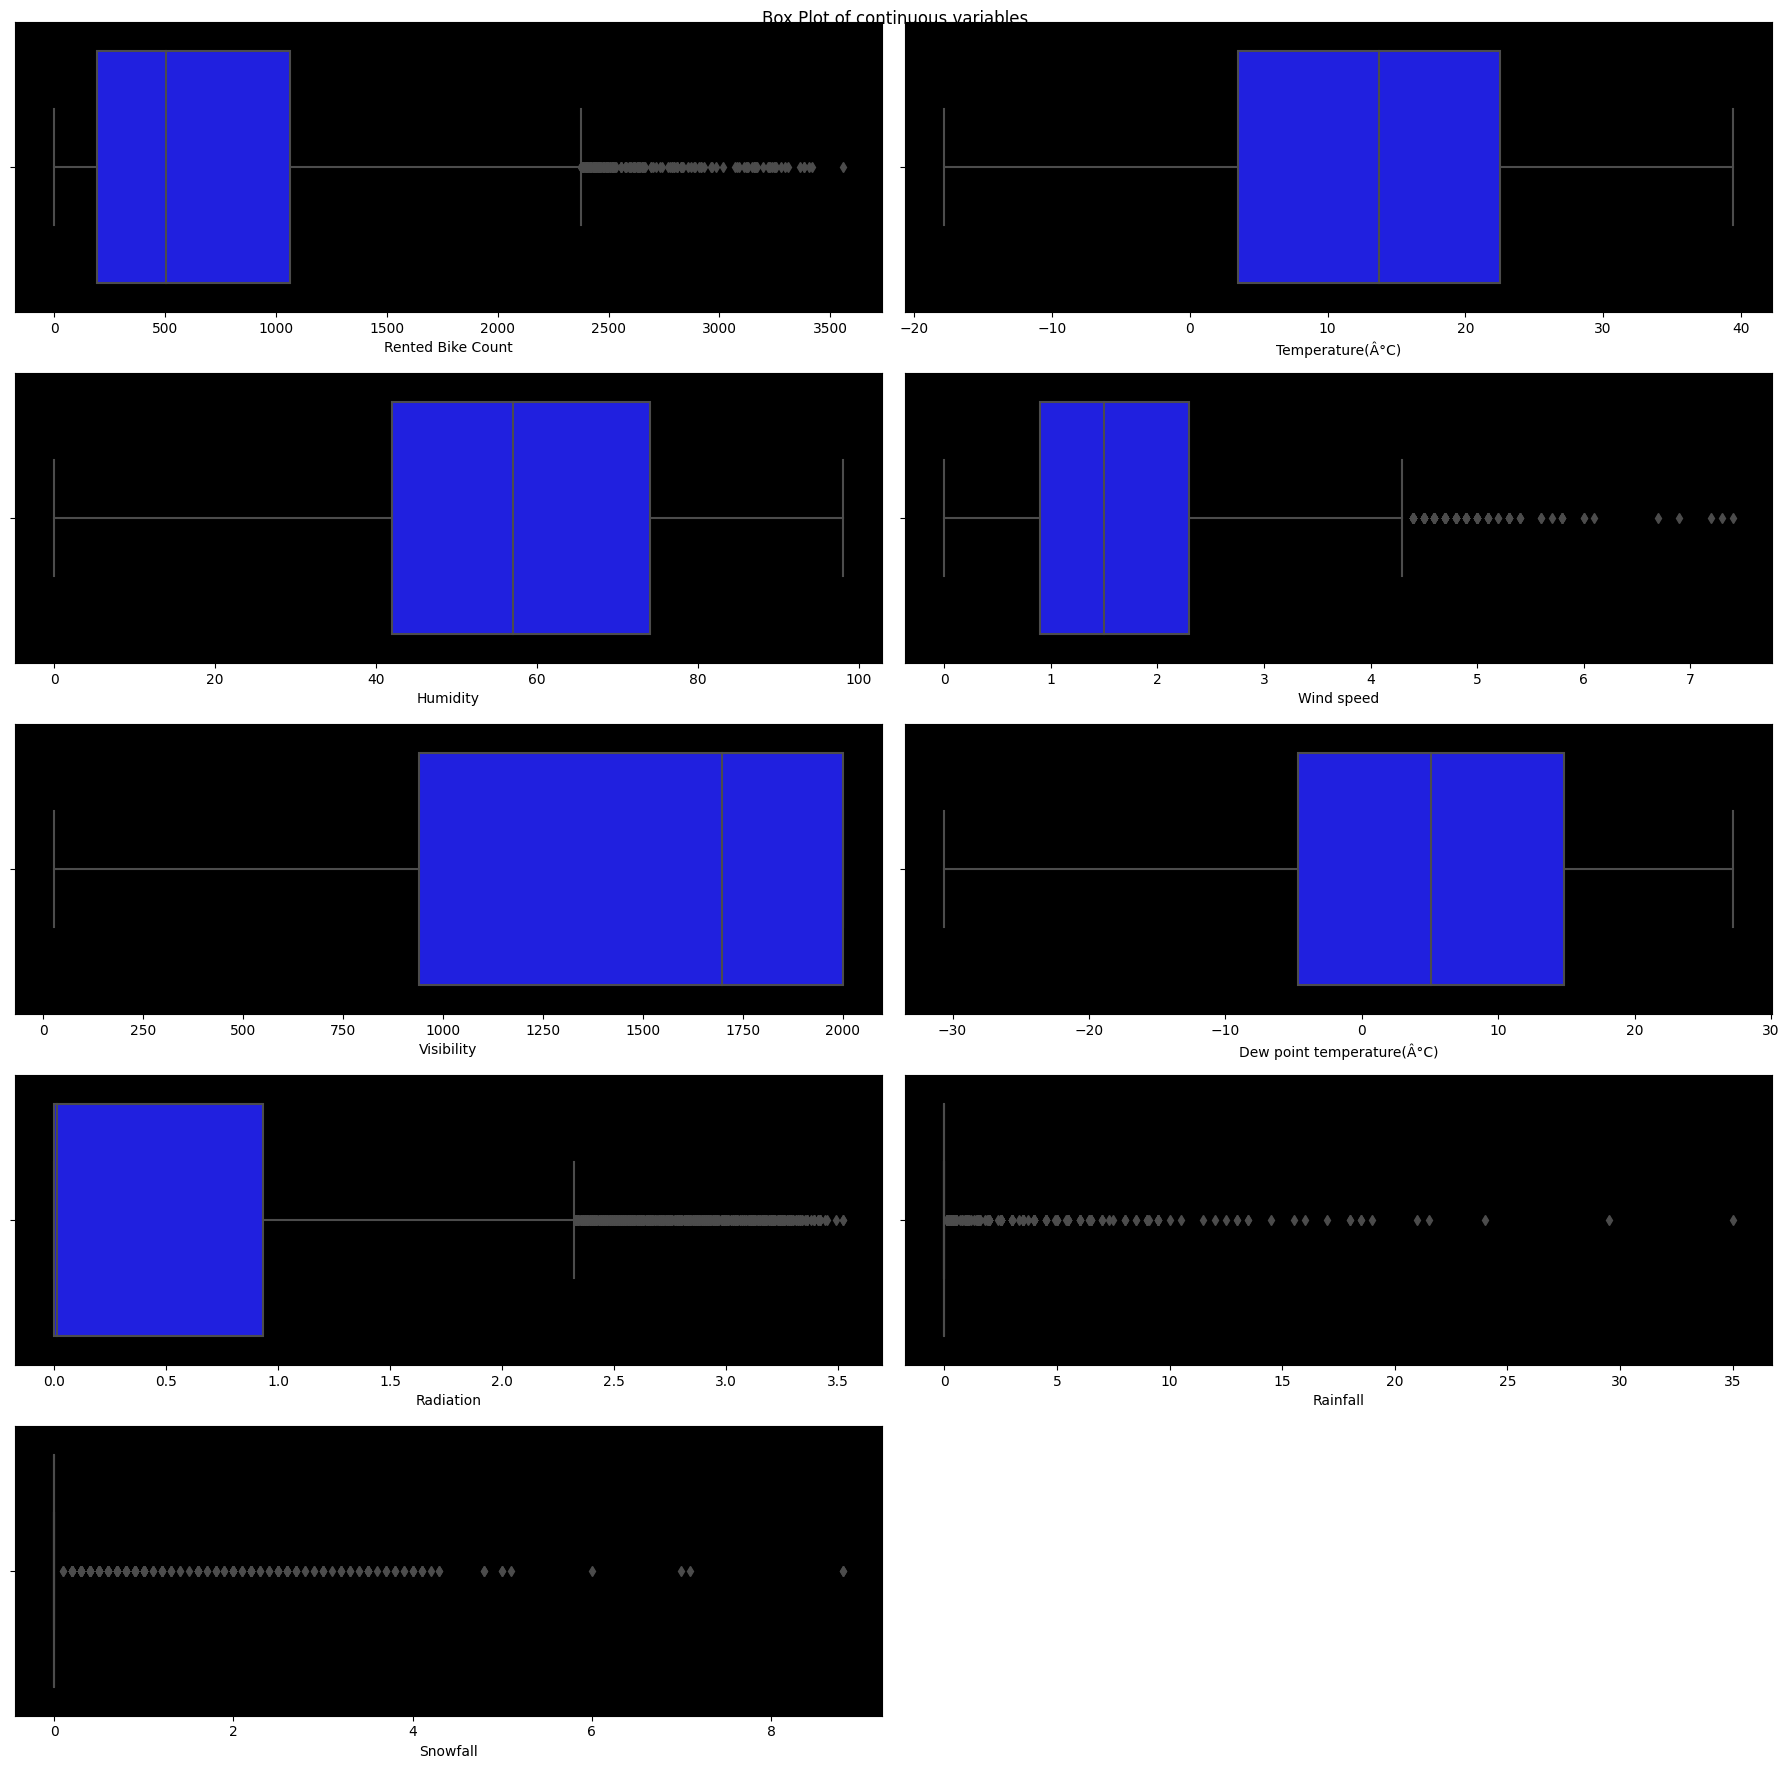

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

**Power Transformation**

In [ ]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [ ]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

Data distribution after applying Power Transformer.

Now the Distribution plots look more symmetrical after applying Power Transformer.

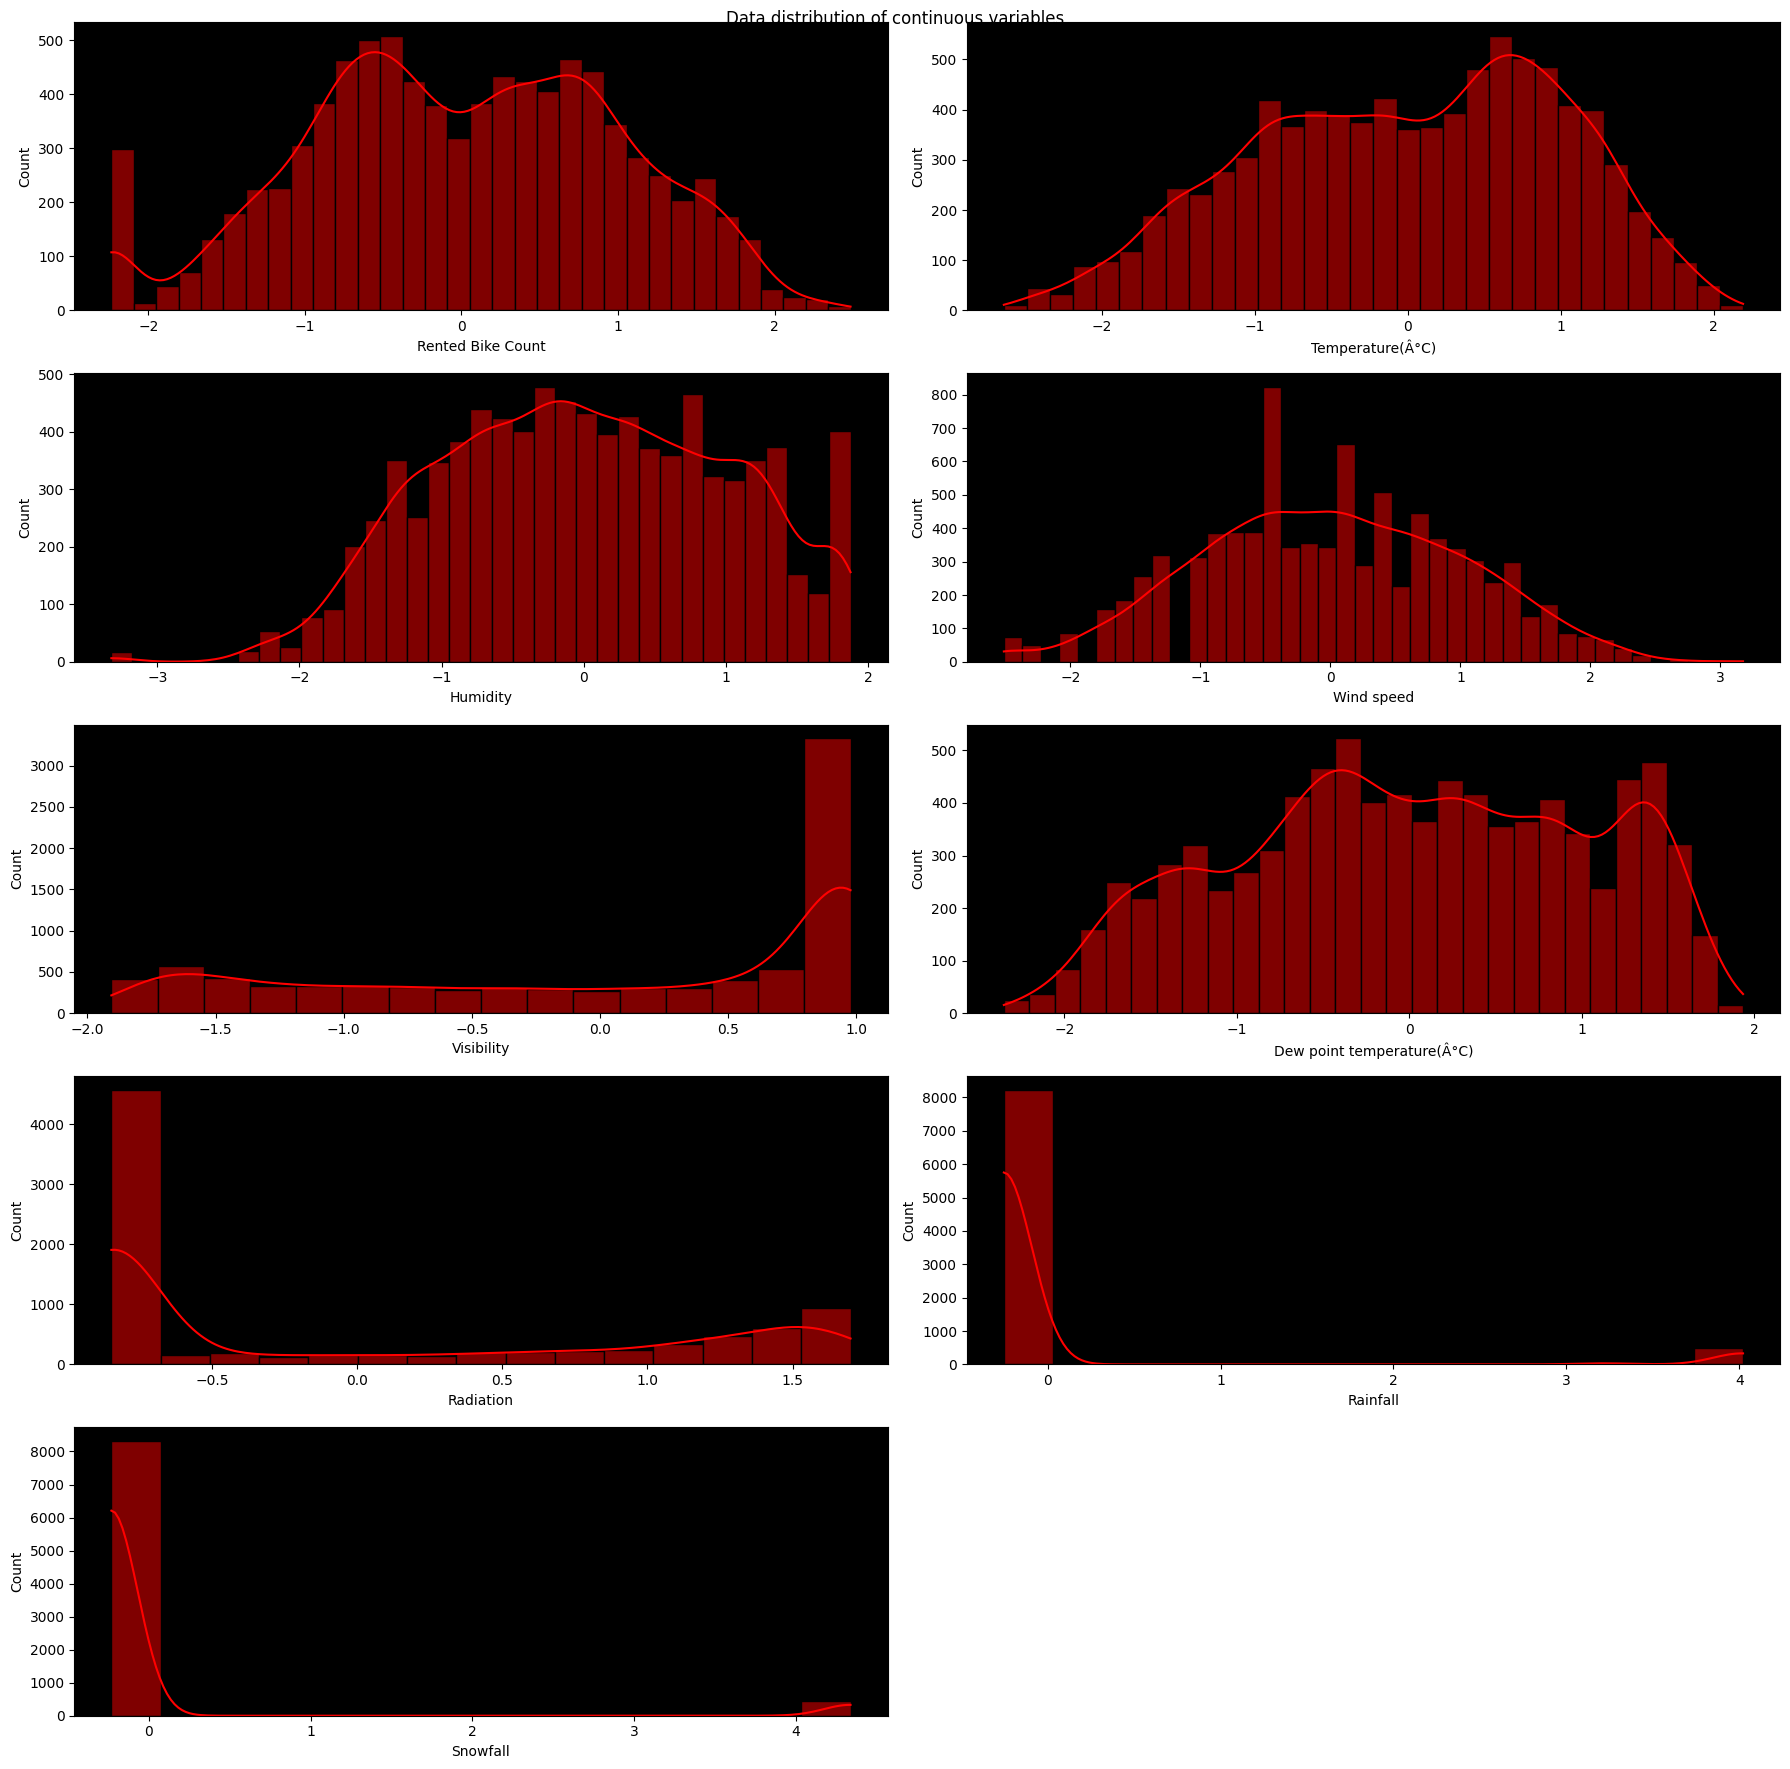

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Box Plot after applyig Power Transformer.

Now our Box plots look better after treating the outliers.

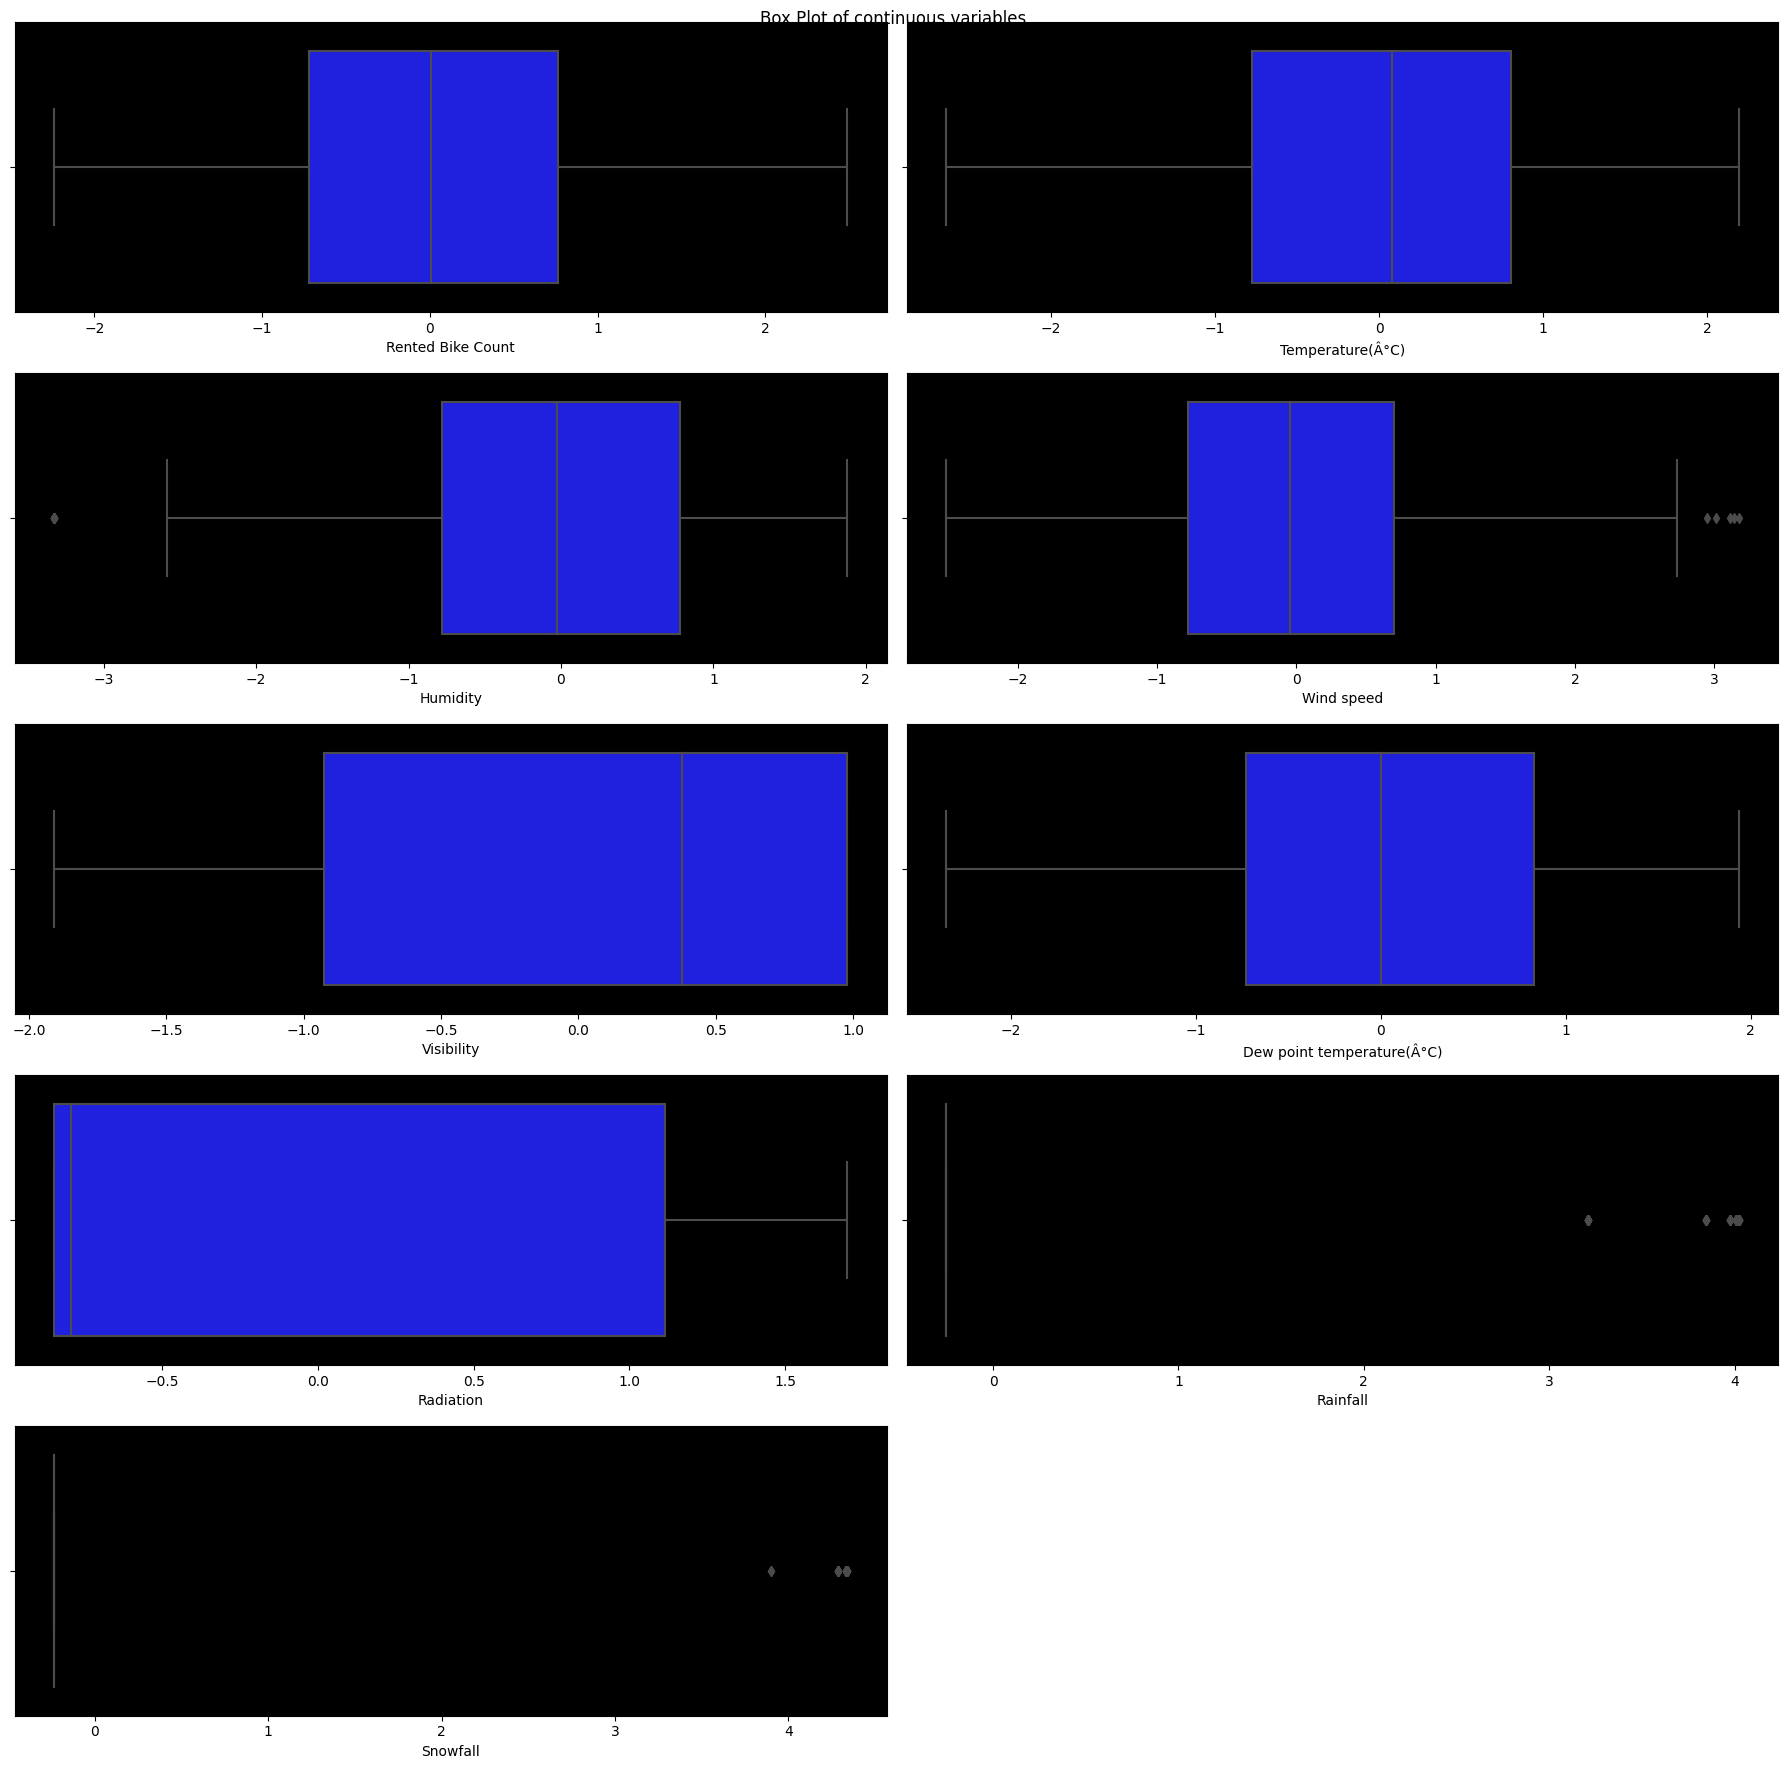

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

Heatmap

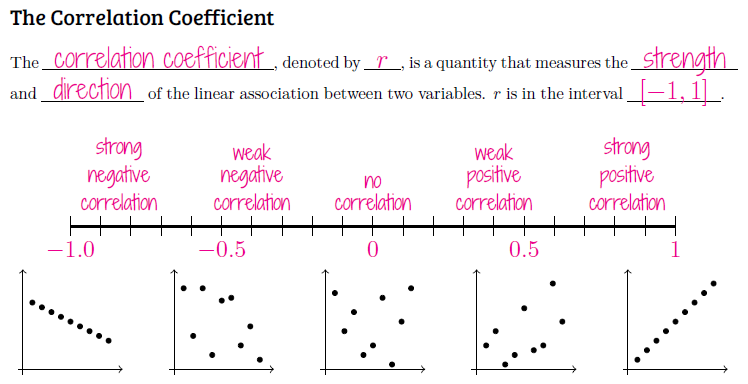

With the above heatmap plot we can interpret which variable is how much correlated to other variable.

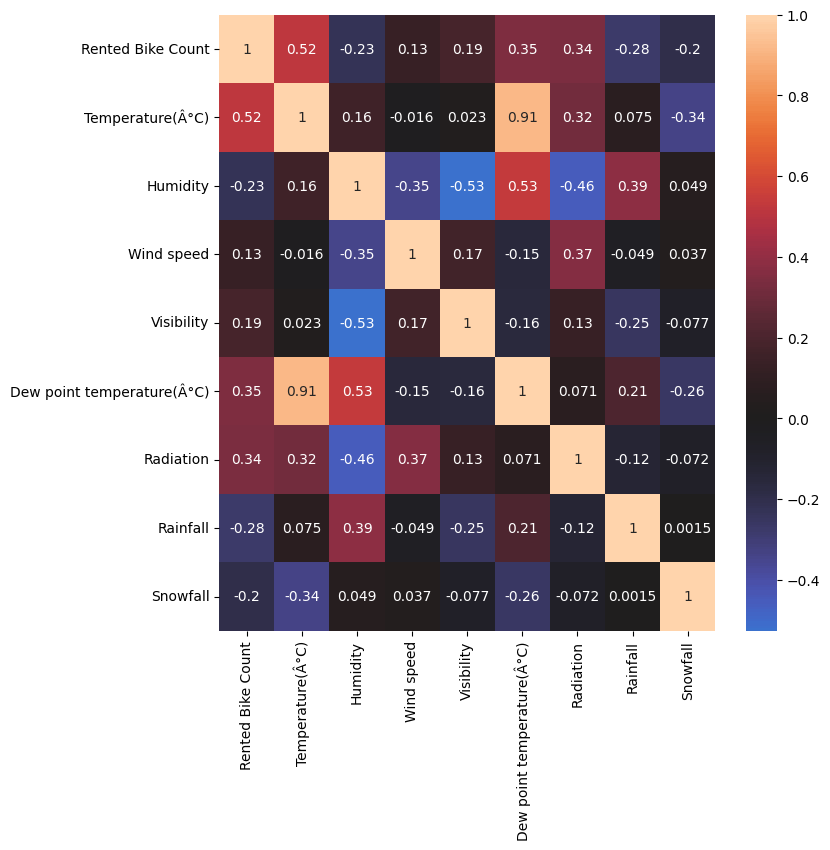

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

**Analysing Categorical Variable**

**Pie Chart** - From the below graph it's clear that this is fully balanced data.

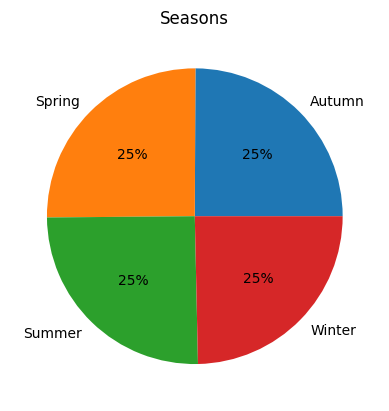

In [ ]:
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

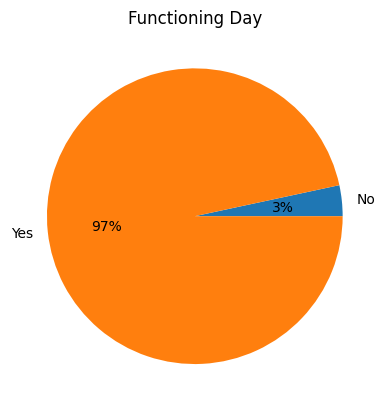

In [ ]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

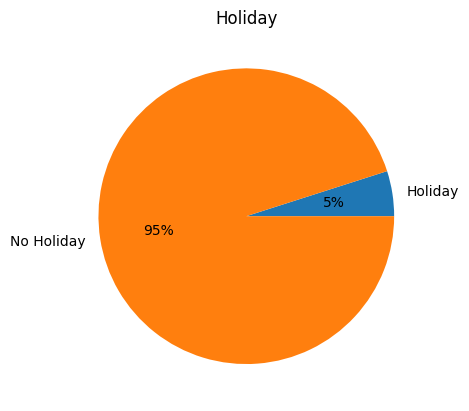

In [ ]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

Count plot shows that the Seasons variable is balanced

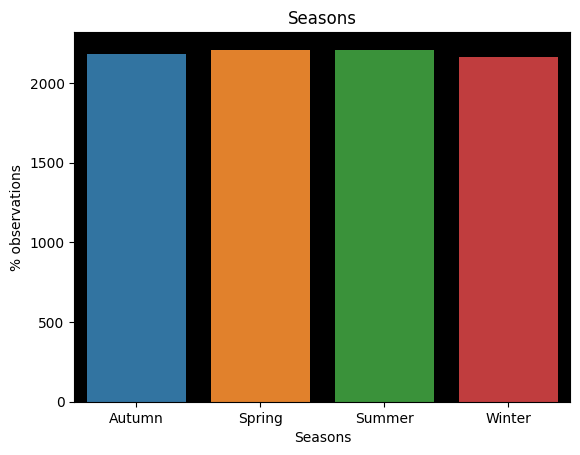

In [ ]:
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()

In [ ]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

**Variance Inflation Factor-**

What is VIF?

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.

* Between 1 and 5 = moderately correlated.

* Greater than 5 = highly correlated.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature(Â°C),45.79
1,Humidity,12.01
2,Wind speed,1.23
3,Visibility,1.56
4,Dew point temperature(Â°C),60.27
5,Radiation,1.86
6,Rainfall,1.20
7,Snowfall,1.17


In [ ]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
del X['Dew point temperature(Â°C)']

In [ ]:
calc_vif(X.select_dtypes(include=['float','int']))
#Each variable is within the range between 1 and 5.

,variables,VIF
0,Temperature(Â°C),1.56
1,Humidity,2.44
2,Wind speed,1.23
3,Visibility,1.50
4,Radiation,1.83
5,Rainfall,1.19
6,Snowfall,1.16


**Feature Selection-**

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.
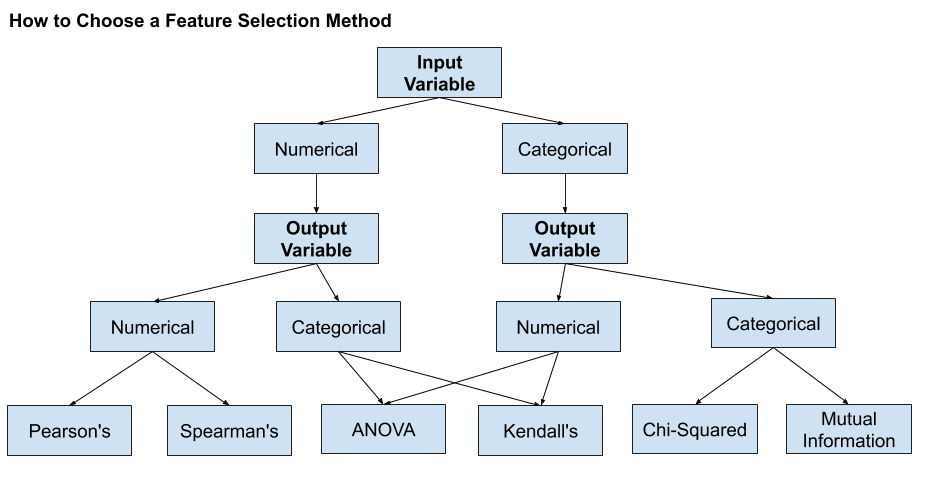

In our dataset we have numerical Input variable and numerical Output variable.so we will use Pearson's for the feature selection.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7d23dd195b40>)

In [ ]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

**Feature importance Graph**

Temperature(Â°C) : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_1 : 0.27%
Hour_2 : 0.91%
Hour_3 : 1.95%
Hour_4 : 3.25%
Hour_5 : 3.11%
Hour_6 : 1.15%
Hour_7 : 0.02%
Hour_8 : 0.47%
Hour_9 : 0.00%
Hour_10 : 0.05%
Hour_11 : 0.00%
Hour_12 : 0.04%
Hour_13 : 0.08%
Hour_14 : 0.11%
Hour_15 : 0.21%
Hour_16 : 0.39%
Hour_17 : 0.93%
Hour_18 : 2.18%
Hour_19 : 0.97%
Hour_20 : 0.56%
Hour_21 : 0.49%
Hour_22 : 0.28%
Hour_23 : 0.00%


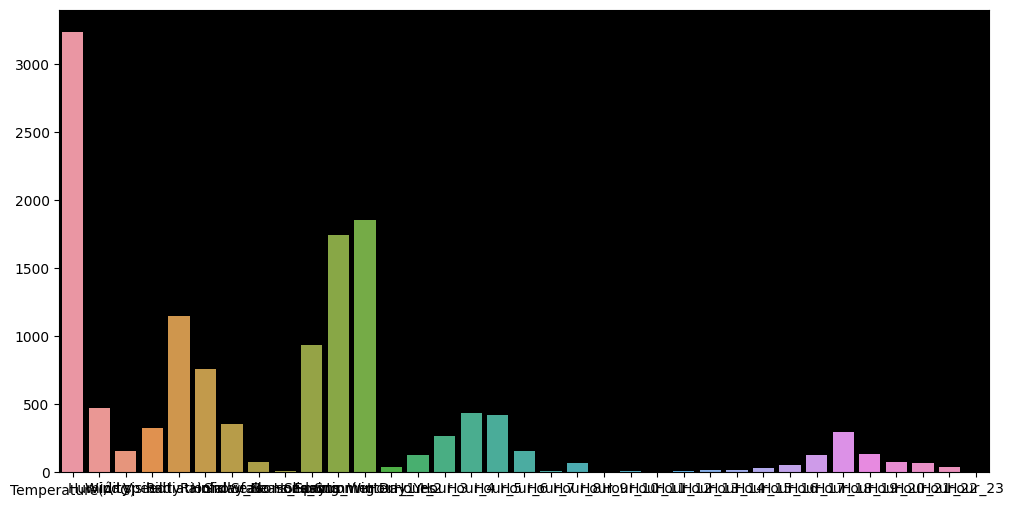

In [ ]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.

**Splitting our dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

**Feature Scaling-**

What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
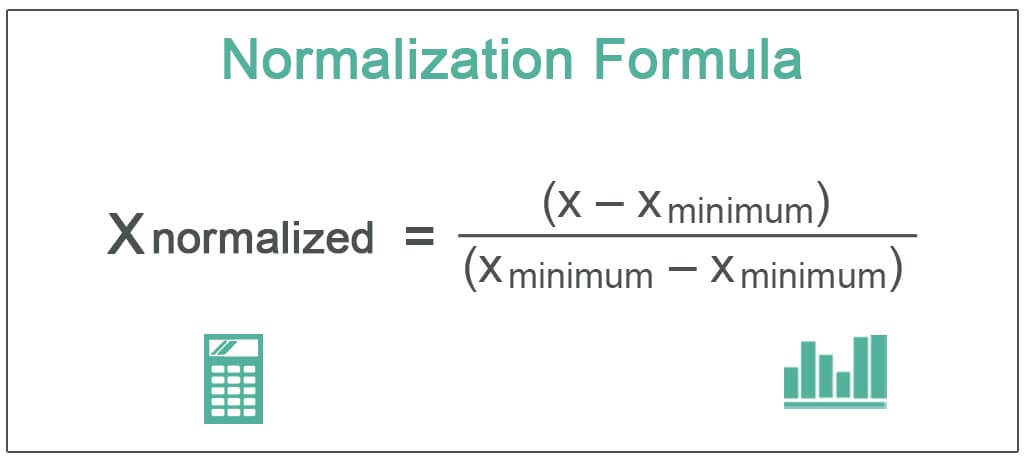

What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

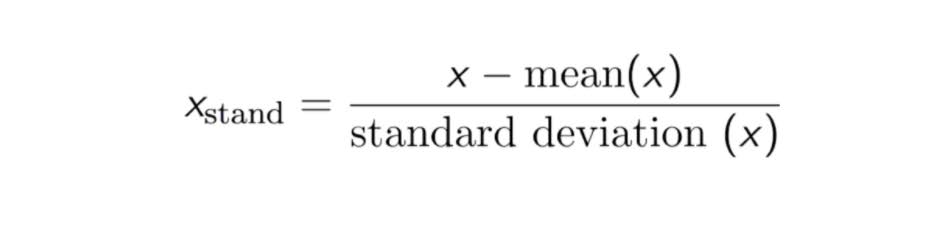

Here we are going to use Standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Modeling**

Performance Measures for Regression

R-Square:

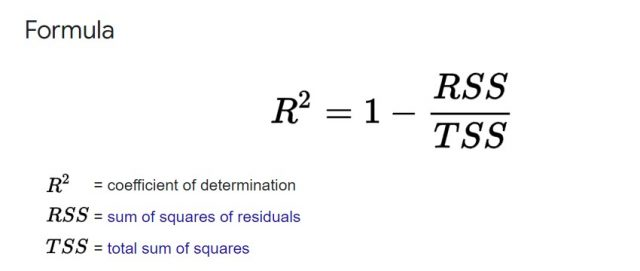


Mean Square Error:

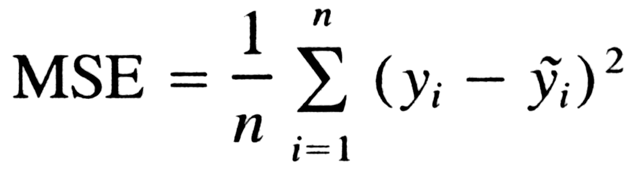

**K-fold Cross validation-**


What is Cross Validation?

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

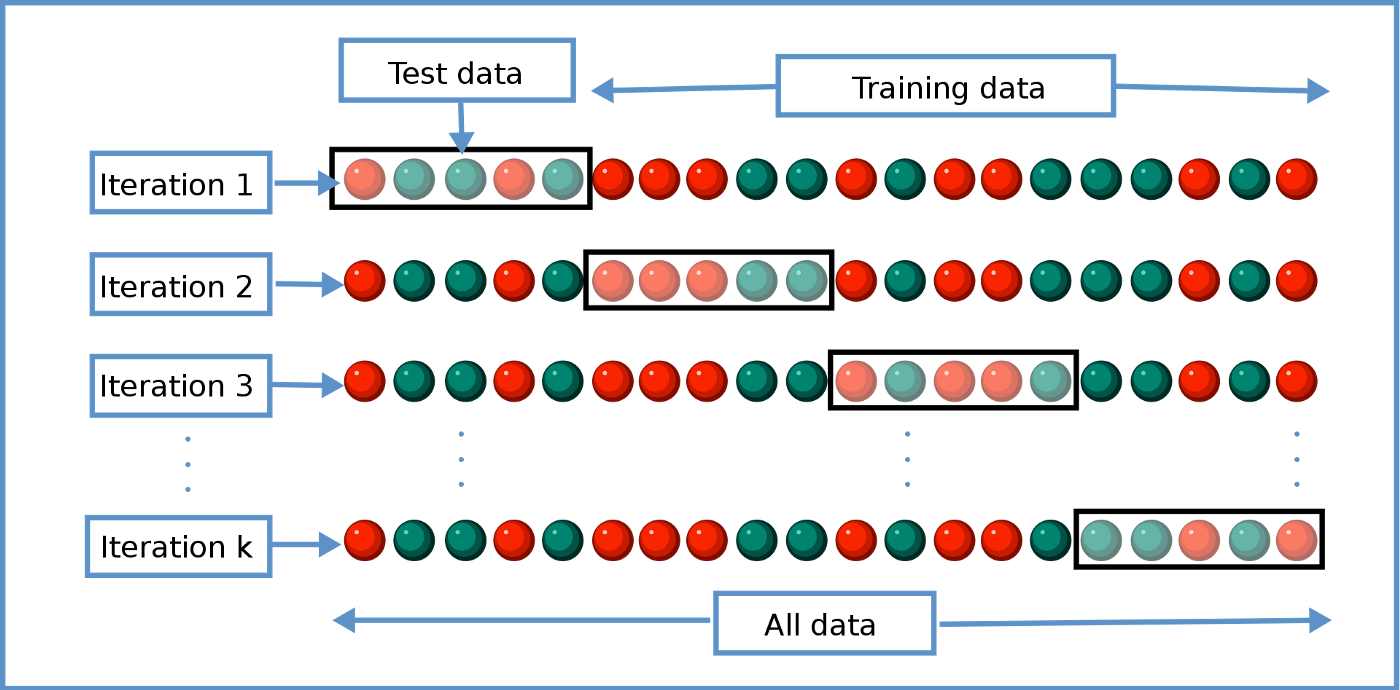

In [ ]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
#creating dictionary for storing different models accuracy
model_comparison={}

**Linear Regression**

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


**Linear Regression Summary**

In [ ]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):                        0.00
Time:                        20:44:46   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

**Assumptions of linear regression**

In [ ]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [ ]:
np.mean(residuals)

0.0106991770214442

**Checking for normality of the residuals**

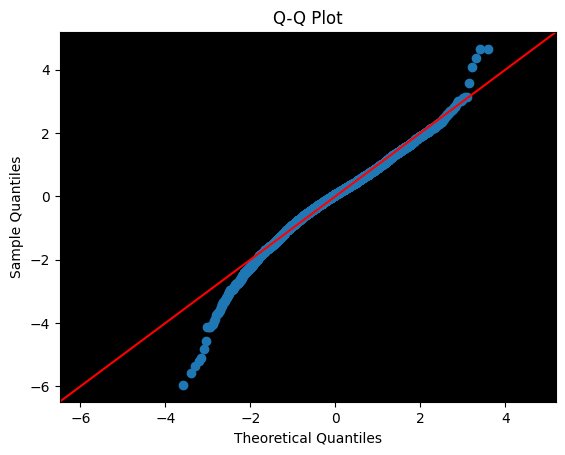

In [ ]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

**Checking for homoscedasticity**

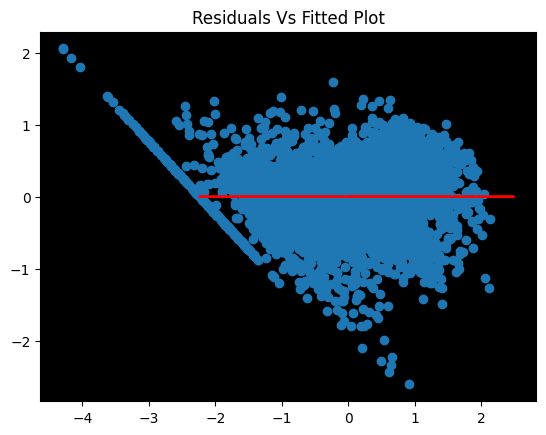

In [ ]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

**Polynomial Regression**

In [ ]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.66%
Model MSE : 11.29%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


**Decision Tree Regression**

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.02%
Model MSE : 19.90%
Cross Val Accuracy: 78.78 %
Cross Val Standard Deviation: 1.13 %


**Random Forest Regression**

In [ ]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 87.35%
Model MSE : 12.60%
Cross Val Accuracy: 88.24 %
Cross Val Standard Deviation: 0.65 %


**Bagging Regressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.41%
Model MSE : 11.54%
Cross Val Accuracy: 89.08 %
Cross Val Standard Deviation: 0.66 %


**Stacking Regressor**

In [ ]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [ ]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.02%
Model MSE : 10.94%
Cross Val Accuracy: 89.73 %
Cross Val Standard Deviation: 0.56 %


**Model Comparison**

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.02%,10.94%,89.73%,0.56%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.41%,11.54%,89.08%,0.66%
Random forest Regression,87.35%,12.60%,88.24%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.02%,19.90%,78.78%,1.13%


**Maximum Accuracies in each Column**

In [ ]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.02%,10.94%,89.73%,0.56%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.41%,11.54%,89.08%,0.66%
Random forest Regression,87.35%,12.60%,88.24%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.02%,19.90%,78.78%,1.13%


**Minimum Accuracies in each Column**

In [ ]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.02%,10.94%,89.73%,0.56%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.41%,11.54%,89.08%,0.66%
Random forest Regression,87.35%,12.60%,88.24%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.02%,19.90%,78.78%,1.13%
